In [1]:
import pandas as pd
import os
import numpy as np
from glob import glob

In [2]:
files = glob('listings_*')

In [3]:
files.sort()
files

['listings_1.csv',
 'listings_10.csv',
 'listings_11.csv',
 'listings_12.csv',
 'listings_2.csv',
 'listings_3.csv',
 'listings_4.csv',
 'listings_5.csv',
 'listings_6.csv',
 'listings_7.csv',
 'listings_8.csv',
 'listings_9.csv']

In [4]:
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

In [5]:
data_new = data.drop_duplicates()

In [6]:
data_new.shape

(443727, 16)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

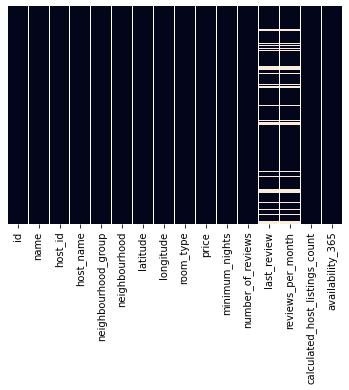

In [8]:
#null value
sns.heatmap(data_new.isnull(),yticklabels=False,cbar=False)


In [9]:
data_new[data_new['price']==0].head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21342,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.04,3,0
23597,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,18,2019-12-09,0.63,6,0
23703,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.42,2,0
23728,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,3,5,2019-09-05,0.19,1,9
23745,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,125,2019-12-23,4.51,6,234
23746,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,115,2019-12-21,4.16,6,258
23747,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,128,2019-12-13,4.61,6,257
24154,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
47565,39722994,@@@@ Bryant Park 2 Bedrooms NYC @@@@,17655093,Ali,Manhattan,Midtown,40.75452,-73.99170,Entire home/apt,0,30,1,2019-11-09,0.54,1,24
47646,39755308,AMAZING 2 BEDS IN MEATPACKING/CHELSEA MARKET!!,91268177,Beatriz,Manhattan,Chelsea,40.74344,-74.00578,Entire home/apt,0,3,5,2019-12-26,2.68,4,55


In [10]:
data_new['price'].describe()

count    443727.000000
mean        154.870389
std         378.264649
min           0.000000
25%          65.000000
50%         100.000000
75%         169.000000
max       25000.000000
Name: price, dtype: float64

In [11]:
for i in range(0, 100, 10):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 45
20 percentile value is 59
30 percentile value is 72
40 percentile value is 89
50 percentile value is 100
60 percentile value is 125
70 percentile value is 150
80 percentile value is 190
90 percentile value is 250
100 percentile value is  25000


In [12]:
for i in range(90, 100, 1):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 250
91 percentile value is 275
92 percentile value is 290
93 percentile value is 300
94 percentile value is 320
95 percentile value is 350
96 percentile value is 395
97 percentile value is 450
98 percentile value is 550
99 percentile value is 800
100 percentile value is  25000


In [13]:
data_new[data_new['price']==25000].head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
317582,35536179,Small King Room,262458398,Hotel Hayden,Manhattan,Chelsea,40.74765,-73.99090,Hotel room,25000,1,55,2020-03-08,8.82,3,0
317583,35536439,Double Room,262458398,Hotel Hayden,Manhattan,Chelsea,40.75335,-73.99811,Hotel room,25000,1,0,NaN,NaN,3,0
318223,36094427,Deluxe Double Room,269288731,The Surrey,Manhattan,Upper East Side,40.77425,-73.96448,Hotel room,25000,1,0,NaN,NaN,2,0


In [14]:
# dropping unnecessary column

data_new.drop('id', axis=1, inplace=True)
data_new.drop('host_id', axis=1, inplace=True)
data_new.drop('name', axis=1, inplace=True)
data_new.drop('host_name', axis=1, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


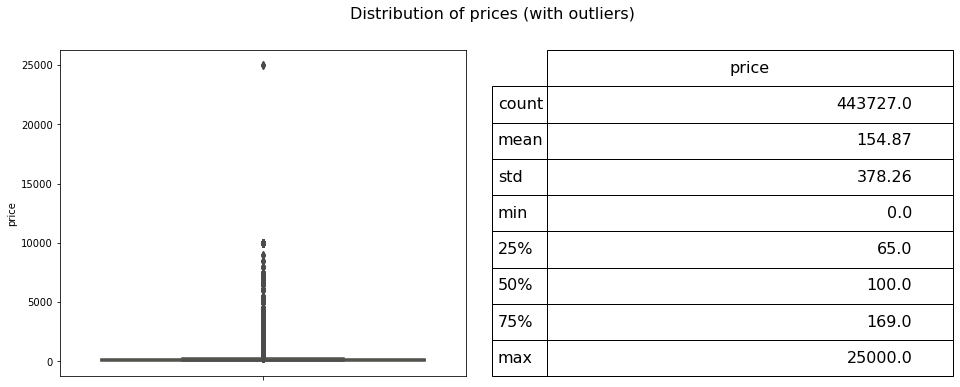

In [15]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

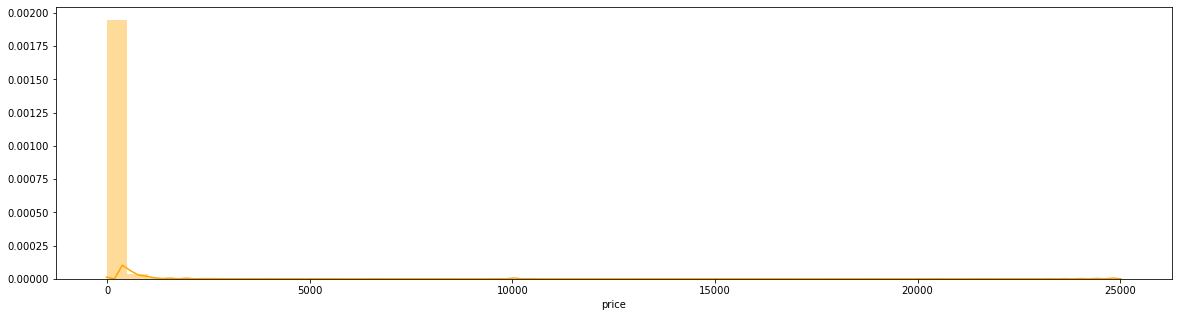

In [16]:
fig = plt.figure(figsize=(20,5))
sns.distplot(data['price'],color='orange')
plt.show()

# Distribution:
    
    Deviation from Normal Distribution
    presence of outliers
    showing skewness
    

In [17]:
print('skewness: {}'.format(data_new['price'].skew()))
print('kurtosis: {}'.format(data_new['price'].kurt()))



skewness: 22.218865828748672
kurtosis: 626.6701528278874


#Skewness - measure of symmetry/assymetry of distribution. If the distribution is perfectly symmetrical, 
#the value of skewness is equal to 0. If skewness > 0 : positive, if skewness < 0 : negative
#Kurtosis - measure of flattening distribution of a feature.

In [18]:
data_new.isnull().sum().sort_values(ascending=False)

reviews_per_month                 68198
last_review                       68197
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
dtype: int64

In [19]:
data_new['reviews_per_month'].fillna(value=0,inplace=True)
data_new.drop('last_review',axis=1,inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,0.39,2,365
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,4.65,1,161
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,0.60,1,0


In [21]:
data_new.isnull().sum().sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
dtype: int64

# Outliers in the Target Variable

In [22]:
#Tukey test will be implemented 

def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [23]:
outliers_index = tukey_outliers(data_new,'price')


In [24]:
data_new.drop(outliers_index, inplace=True)
data_new.reset_index(drop=True, inplace=True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
data_new.shape

(418445, 11)

In [26]:
print('we have {} listings with price equal to 0.'.format(len(data_new[data_new['price']==0])))

we have 144 listings with price equal to 0.


In [27]:
data_new.drop(data_new[data_new['price']==0].index, inplace=True)


In [28]:
data_new.reset_index(drop=True, inplace=True)


In [29]:
data_new.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,0.39,2,365
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,298,4.65,1,161
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,0.60,1,0


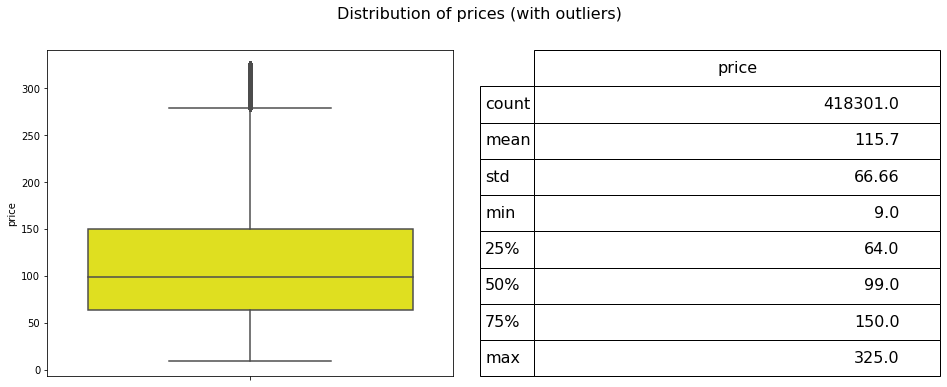

In [30]:
#Target:Price

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = data_new['price'], ax=ax1, color='yellow')
describe = data_new['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

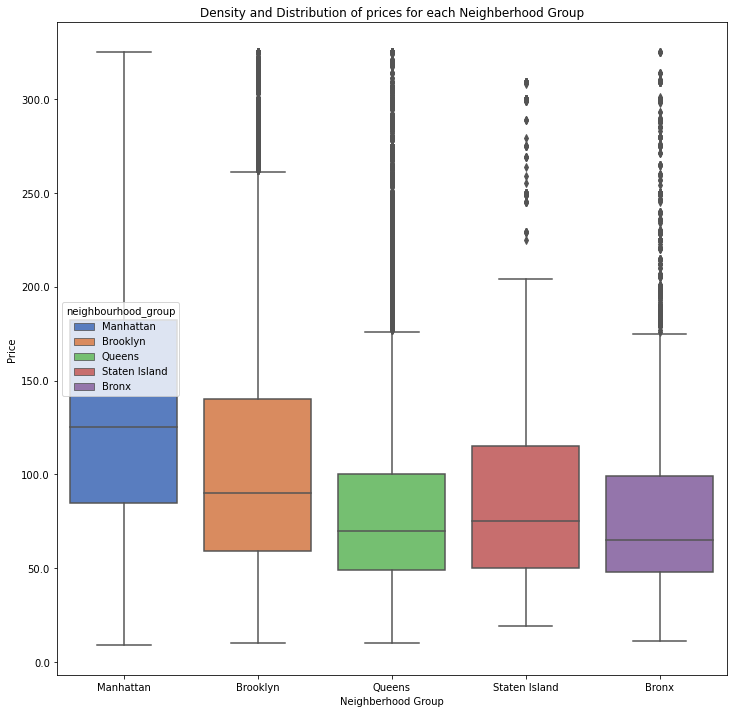

In [31]:
# Filter airbnb prices for shake of the visualization
sub_airbnb_price = data_new[data_new.price < 800]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.boxplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_airbnb_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

In [32]:
data_new.groupby(["neighbourhood_group"])['price'].mean()


neighbourhood_group
Bronx             80.038915
Brooklyn         105.764891
Manhattan        138.574852
Queens            85.492804
Staten Island     90.405711
Name: price, dtype: float64

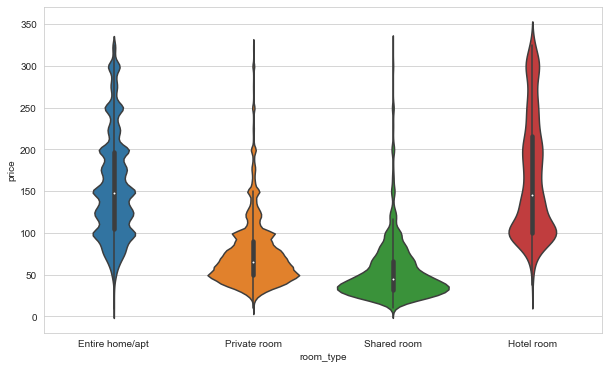

In [33]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.violinplot(data=data_new, x='room_type', y='price')
plt.show()

In [34]:
data_new.groupby(["room_type"])['price'].mean()


room_type
Entire home/apt    154.852985
Hotel room         166.125076
Private room        75.349172
Shared room         54.662529
Name: price, dtype: float64

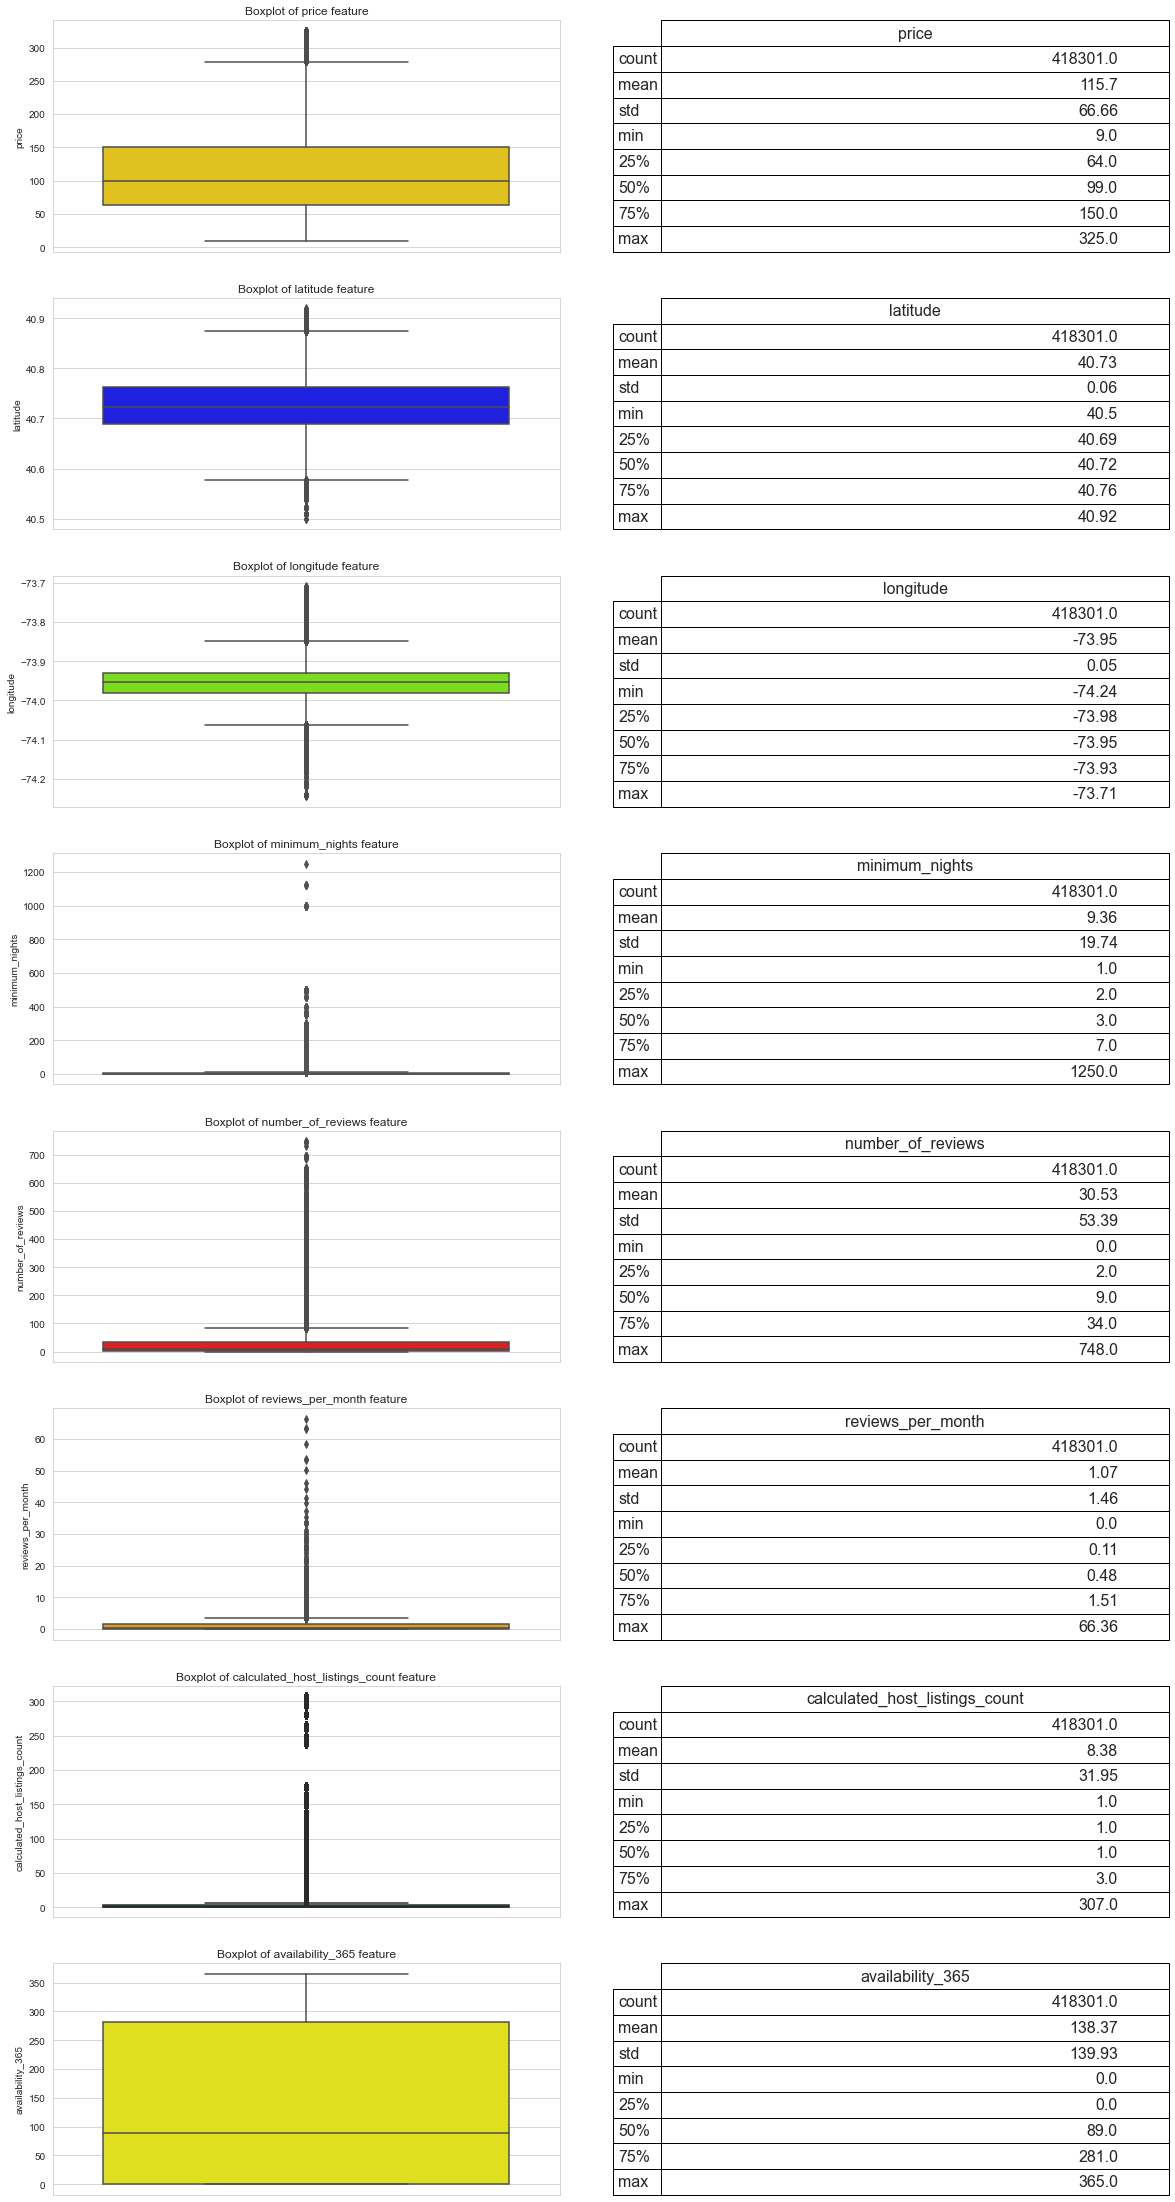

In [35]:
dists = data_new[['price','latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]

fig, ax = plt.subplots(8,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

In [36]:
data_new.shape

(418301, 11)

In [37]:
#data_new.to_csv ('data_new.csv', index = False, header=True)


In [38]:

#data_new.to_csv ('data_new2.csv', header=True)


In [39]:
data_new.shape


(418301, 11)

In [40]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [42]:
import scipy.stats as stats


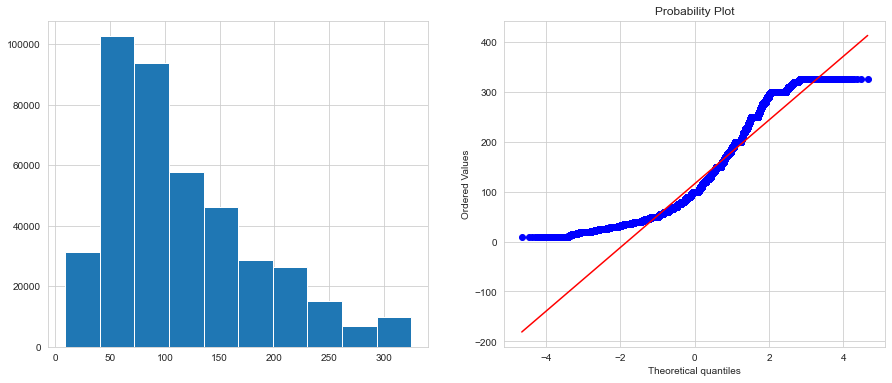

In [43]:
diagnostic_plots(data_new, 'price')


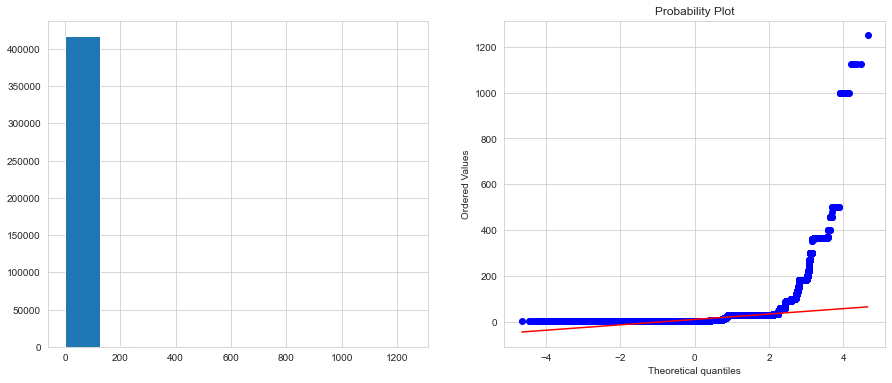

In [44]:
diagnostic_plots(data_new, 'minimum_nights')


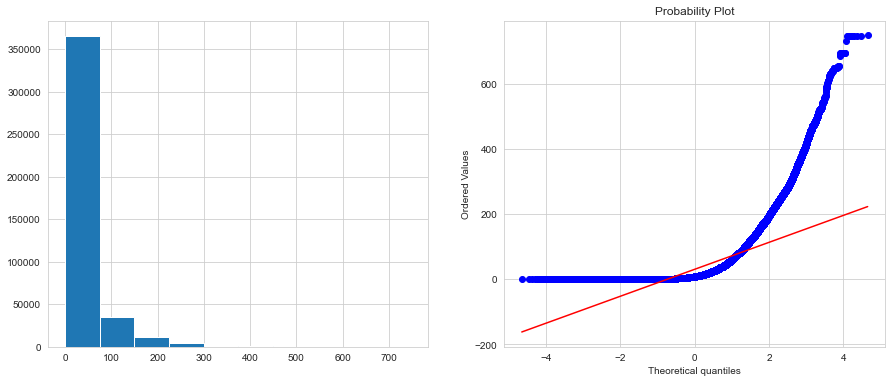

In [45]:
diagnostic_plots(data_new, 'number_of_reviews')


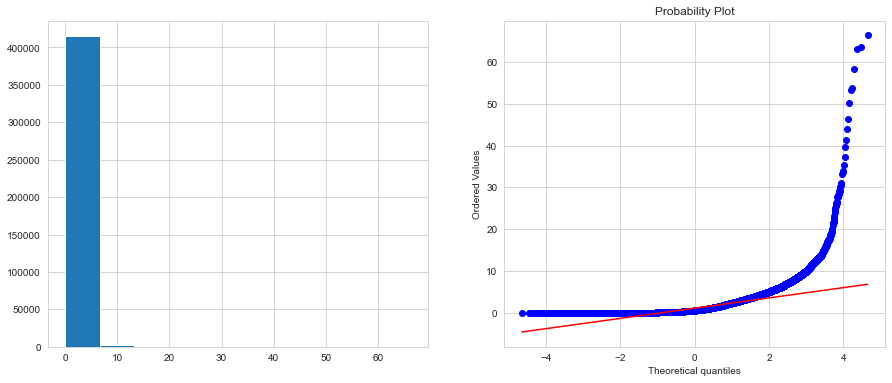

In [46]:
diagnostic_plots(data_new, 'reviews_per_month')


In [47]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

skewed_features = []
for column in dists:
    skew = abs(data_new[column].skew())
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(skew),'Min value: {}'.format(data_new[column].min()))

price           Skewness: 00.98 Min value: 9
minimum_nights  Skewness: 14.94 Min value: 1
calculated_host_listings_count Skewness: 06.70 Min value: 1
number_of_reviews Skewness: 03.41 Min value: 0
reviews_per_month Skewness: 03.98 Min value: 0.0
availability_365 Skewness: 00.51 Min value: 0


In [49]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer

In [50]:

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

In [51]:
data_new['price'],price_lambda = boxcox(data_new['price'])
print('"price lambda": {}'.format(price_lambda))

"price lambda": 0.08544784980940612


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data_new['minimum_nights'],lam = boxcox(data_new['minimum_nights'])
print('"minimum_nights lambda": {}'.format(lam))

"minimum_nights lambda": -0.37577910280344384


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
data_new['calculated_host_listings_count'],lam = boxcox(data_new['calculated_host_listings_count'])
print('calculated_host_listings_count: {}'.format(lam))

calculated_host_listings_count: -0.9952732586928884


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
values = data_new['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)

[-0.05825883]


In [56]:
data_new['number_of_reviews']= boxcox1p(data_new['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

"number_of_reviews lambda: [-0.05825883]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
values = data_new['reviews_per_month'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)

[-0.97882508]


In [58]:
data_new['reviews_per_month']= boxcox1p(data_new['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

"reviews_per_month lambda: [-0.97882508]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
values = data_new['availability_365'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)

[0.21229905]


In [60]:
data_new['availability_365']= boxcox1p(data_new['availability_365'],pt.lambdas_)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))

"availability_365 lambda: [0.21229905]"


C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786
1,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370
2,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000
3,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,4.901924,1.910330,3.514008,0.281502,0.000000,0.000000
4,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,5.296881,0.610228,5.155718,0.788776,0.000000,10.287693


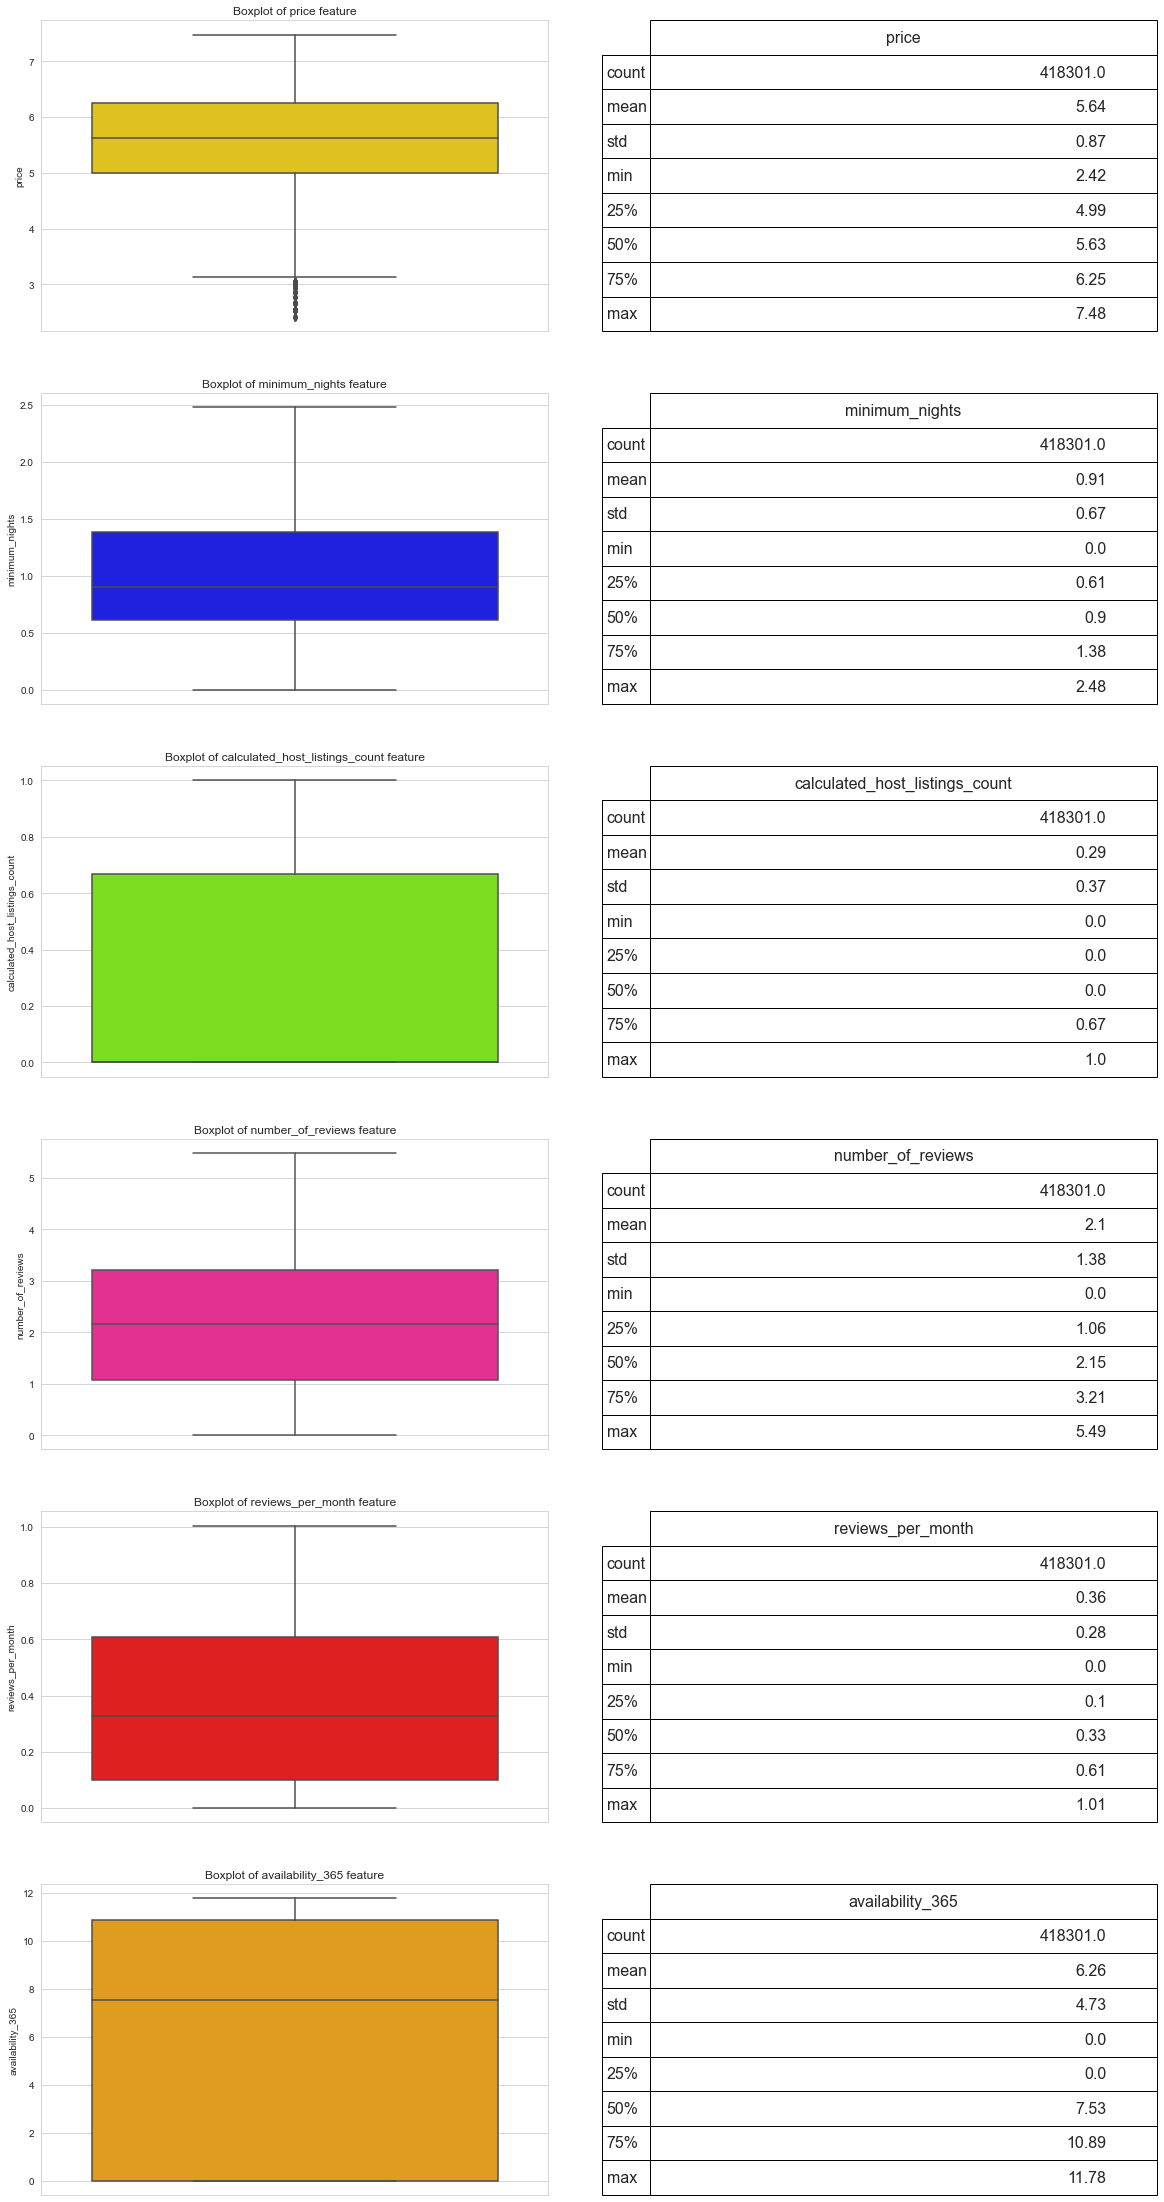

In [62]:
dists = data_new[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = data_new[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=data_new[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

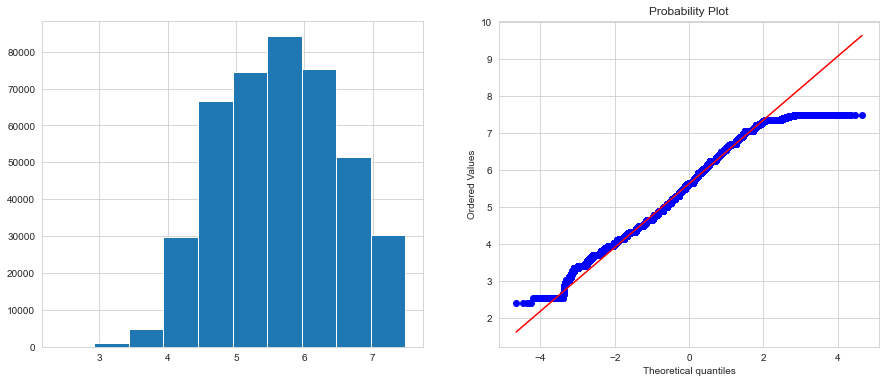

In [63]:
diagnostic_plots(data_new, 'price')


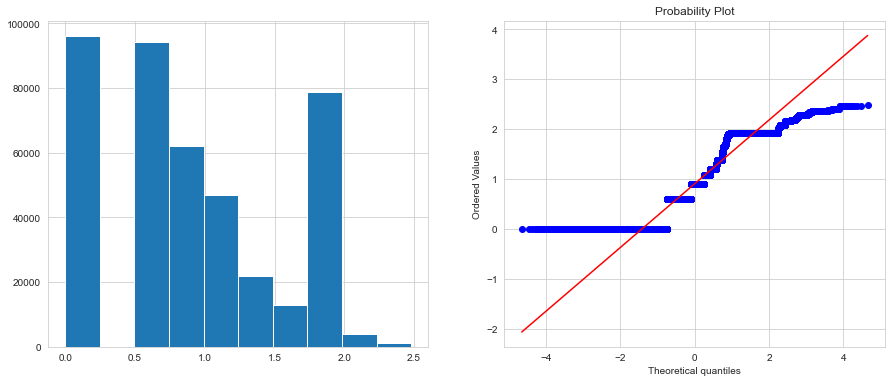

In [64]:
diagnostic_plots(data_new, 'minimum_nights')


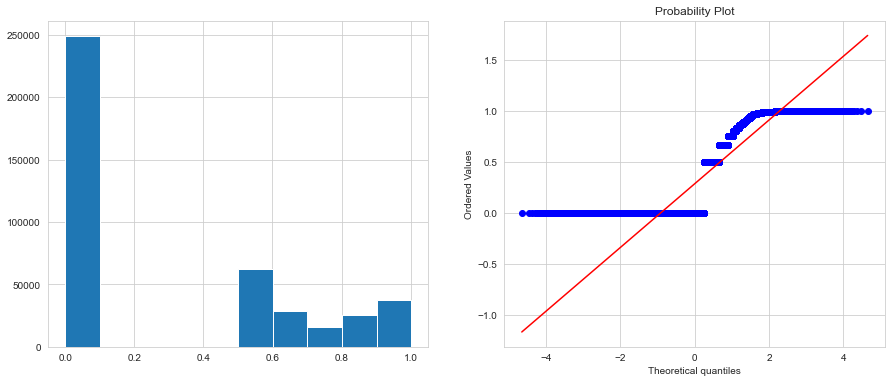

In [65]:
diagnostic_plots(data_new, 'calculated_host_listings_count')


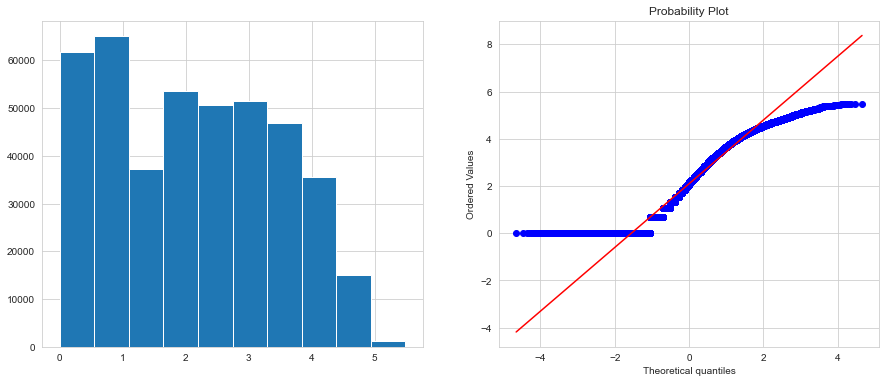

In [66]:
diagnostic_plots(data_new, 'number_of_reviews')


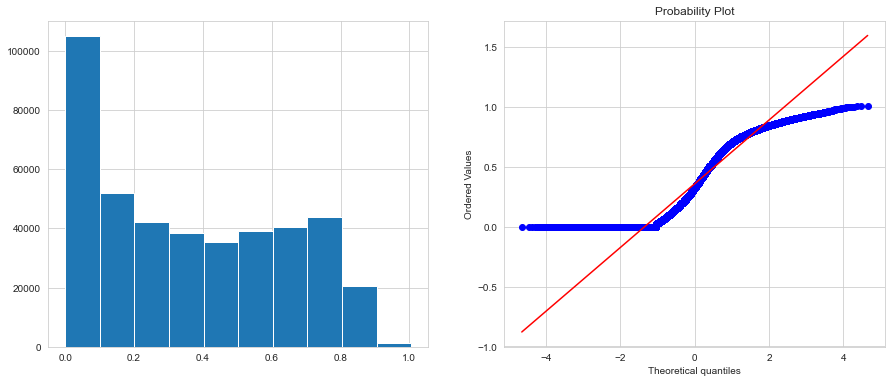

In [67]:
diagnostic_plots(data_new, 'reviews_per_month')


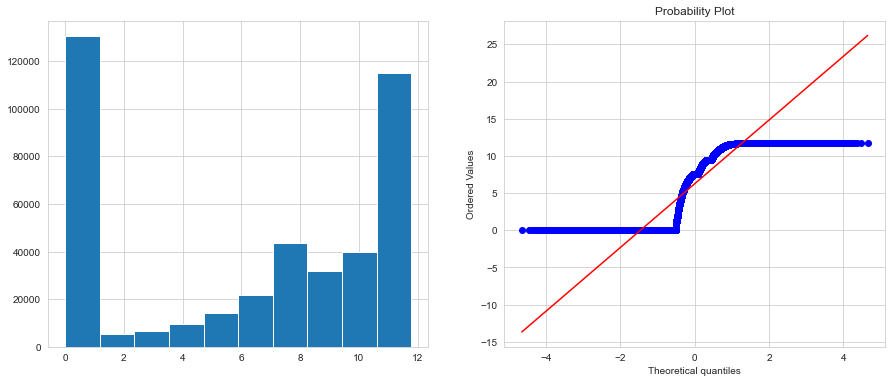

In [68]:
diagnostic_plots(data_new, 'availability_365')


In [69]:
for i in range(90, 100, 1):
    var =data_new["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 6.778042169653174
91 percentile value is 6.851651344849979
92 percentile value is 6.887315364695327
93 percentile value is 6.990118413711867
94 percentile value is 7.0554368554441815
95 percentile value is 7.0554368554441815
96 percentile value is 7.11840809442427
97 percentile value is 7.232180887502009
98 percentile value is 7.344528126515177
99 percentile value is 7.3499632111417155
100 percentile value is  7.480722477876356


In [71]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [72]:
#transforming the categorical data
labelencoder = LabelEncoder()
data_new['neighbourhood'] = labelencoder.fit_transform(data_new['neighbourhood'])
data_new['neighbourhood_group'] = labelencoder.fit_transform(data_new['neighbourhood_group'])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [73]:
data_new = pd.get_dummies(data_new)


In [74]:
data_new.head()


,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,129,40.75362,-73.98377,6.887315,1.380291,3.482156,0.281502,0.500726,11.781786,1,0,0,0
1,1,41,40.68514,-73.95976,5.470900,0.000000,4.850514,0.834060,0.000000,9.161370,1,0,0,0
2,2,139,40.74767,-73.97500,6.701155,0.900074,3.857641,0.376726,0.000000,0.000000,1,0,0,0
3,1,13,40.68688,-73.95596,4.901924,1.910330,3.514008,0.281502,0.000000,0.000000,0,0,1,0
4,2,97,40.76489,-73.98493,5.296881,0.610228,5.155718,0.788776,0.000000,10.287693,0,0,1,0


# Predictive Model

In [75]:
target = data_new['price']


In [76]:
data_new.drop('price', axis=1, inplace=True)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size = .2, random_state=42)

In [78]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (334640, 13)
Dimensions of the training target vector: (334640,)
Dimensions of the test feature matrix: (83661, 13)
Dimensions of the test target vector: (83661,)


In [79]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 64).get_n_splits(data)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [81]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [82]:
for LinearModel in [LinearRegression, RandomForestRegressor, XGBRegressor]:
    if LinearModel == XGBRegressor: 
        reg = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: 
        reg = rmse_cv(LinearModel())
    print('{}: {:.3f} +/- {:.3f}'.format(LinearModel.__name__, -reg.mean(), reg.std()))

LinearRegression: 0.377 +/- 0.002
RandomForestRegressor: 0.104 +/- 0.001
XGBRegressor: 0.305 +/- 0.001


In [83]:
def rmse(actual,predicted):
    return(np.sqrt(mean_squared_error(actual, predicted)))

In [84]:
def model_scores(model, cv_model, y_train, y_test, pred_train, pred_test):
    mse = mean_squared_error(y_test, lin_reg_pred_test)
    results = pd.DataFrame({'Model':['{}'.format(type(model).__name__)],
                'CV error': '{:.3f}'.format(cv_model.mean()), 
                'CV std': '{:.3f}'.format(cv_model.std()),
                'RMSE train': [rmse(y_train, pred_train)],
                'RMSE test': [rmse(y_test, pred_test)],
                'R2 train': [r2_score(y_train, pred_train)],
                'R2 test': [r2_score(y_test, pred_test)]})
    results = results.round(decimals=4)

    return results

# Linear Regression

In [86]:
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg_cv = -rmse_cv(LinearRegression())
lin_reg_pred_train = lin_reg.predict(X_train)
lin_reg_pred_test = lin_reg.predict(X_test)

lin_reg_results = model_scores(lin_reg, lin_reg_cv, y_train, y_test, lin_reg_pred_train, lin_reg_pred_test)

lin_reg_results.style.hide_index()

Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
LinearRegression,0.377,0.002,0.614300,0.615500,0.496500,0.494300


In [88]:
lin_reg.coef_


array([ 3.86908352e-02,  5.54531449e-04,  1.03125049e+00, -3.65981248e+00,
       -1.42559144e-01,  1.44840496e-02, -2.04957747e-01, -1.03550026e-01,
        1.63161932e-02,  7.03752830e-01,  5.71236498e-01, -3.65316045e-01,
       -9.09673284e-01])

# Random Forest

In [91]:
rfr_reg = RandomForestRegressor(random_state=42)
rfr_reg.fit(X_train, y_train) 

rfr_reg_cv = -rmse_cv(RandomForestRegressor())
rfr_pred_train = rfr_reg.predict(X_train)
rfr_pred_test = rfr_reg.predict(X_test)

rfr_reg_results = model_scores(rfr_reg, rfr_reg_cv, y_train, y_test, rfr_pred_train, rfr_pred_test)

rfr_reg_results.style.hide_index()

Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
RandomForestRegressor,0.104,0.001,0.118100,0.306100,0.981400,0.874900


# XGBOOST

In [92]:
xgb_reg = XGBRegressor(n_estimators=1000)
xgb_reg.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

[21:21:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [93]:
xgb_reg = XGBRegressor(learning_rate=0.3,
                      n_estimators=1000,
                      max_depth=6, min_child_weight=1)

xgb_reg_cv = -rmse_cv(xgb_reg)

xgb_reg.fit(X_train, y_train)
xgb_pred_train = xgb_reg.predict(X_train)
xgb_pred_test = xgb_reg.predict(X_test)

xgb_reg_results = model_scores(xgb_reg, xgb_reg_cv, y_train, y_test, xgb_pred_train, xgb_pred_test)

xgb_reg_results.style.hide_index()

[21:24:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model,CV error,CV std,RMSE train,RMSE test,R2 train,R2 test
XGBRegressor,0.174,0.001,0.364700,0.414600,0.822500,0.770500


In [96]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error

# XGBOOST

In [97]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test)),
        r2_score(y_test,xgb_pred_test) * 100,
        mean_absolute_error(y_test,xgb_pred_test)
        ))


        Mean Squared Error: 0.414627056083954
        R2 Score: 77.04797805386922
        Mean Absolute Error: 0.3089370856440916
     


# Random Forest

In [98]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, rfr_pred_test)),
        r2_score(y_test,rfr_pred_test) * 100,
        mean_absolute_error(y_test,rfr_pred_test)
        ))


        Mean Squared Error: 0.3060823196302204
        R2 Score: 87.49216446293678
        Mean Absolute Error: 0.18446876106083634
     


# Linear Regression

In [99]:
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, lin_reg_pred_test)),
        r2_score(y_test,lin_reg_pred_test) * 100,
        mean_absolute_error(y_test,lin_reg_pred_test)
        ))


        Mean Squared Error: 0.6154675388616478
        R2 Score: 49.427318859394944
        Mean Absolute Error: 0.4848213702730525
     


In [100]:
from keras import models, layers, optimizers, regularizers


Using TensorFlow backend.
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\haris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [102]:
X_train.shape[1]

13

In [104]:
# X_train.head()

# ANN

In [108]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(13, activation='relu'))
nn2.add(layers.Dense(6, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Train on 301176 samples, validate on 33464 samples
Epoch 1/100
301176/301176 [==============================] - 4s 12us/step - loss: 1.4462 - mean_squared_error: 1.4462 - val_loss: 0.4209 - val_mean_squared_error: 0.4209
Epoch 2/100
301176/301176 [==============================] - 4s 12us/step - loss: 0.4110 - mean_squared_error: 0.4110 - val_loss: 0.4079 - val_mean_squared_error: 0.4079
Epoch 3/100
301176/301176 [==============================] - 4s 12us/step - loss: 0.4055 - mean_squared_error: 0.4055 - val_loss: 0.4055 - val_mean_squared_error: 0.4055
Epoch 4/100
301176/301176 [==============================] - 3s 11us/step - loss: 0.4025 - mean_squared_error: 0.4025 - val_loss: 0.4038 - val_mean_squared_error: 0.4038
Epoch 5/100
301176/301176 [==============================] - 3s 11us/step - loss: 0.4018 - mean_squared_error: 0.4018 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch 6/100
301176/301176 [==============================] - 3s 11us/step - loss: 0.4015 - mean_squ

Epoch 49/100
301176/301176 [==============================] - 2s 8us/step - loss: 0.3836 - mean_squared_error: 0.3836 - val_loss: 0.3969 - val_mean_squared_error: 0.3969
Epoch 50/100
301176/301176 [==============================] - 2s 5us/step - loss: 0.3820 - mean_squared_error: 0.3820 - val_loss: 0.3841 - val_mean_squared_error: 0.3841
Epoch 51/100
301176/301176 [==============================] - 2s 6us/step - loss: 0.3815 - mean_squared_error: 0.3815 - val_loss: 0.3829 - val_mean_squared_error: 0.3829
Epoch 52/100
301176/301176 [==============================] - 2s 6us/step - loss: 0.3796 - mean_squared_error: 0.3796 - val_loss: 0.3780 - val_mean_squared_error: 0.3780
Epoch 53/100
301176/301176 [==============================] - 3s 10us/step - loss: 0.3778 - mean_squared_error: 0.3778 - val_loss: 0.3760 - val_mean_squared_error: 0.3760
Epoch 54/100
301176/301176 [==============================] - 2s 8us/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.3776 - val_mean_s

301176/301176 [==============================] - 2s 6us/step - loss: 0.3534 - mean_squared_error: 0.3534 - val_loss: 0.3562 - val_mean_squared_error: 0.3562
Epoch 98/100
301176/301176 [==============================] - 2s 6us/step - loss: 0.3538 - mean_squared_error: 0.3538 - val_loss: 0.3569 - val_mean_squared_error: 0.3569
Epoch 99/100
301176/301176 [==============================] - 2s 6us/step - loss: 0.3538 - mean_squared_error: 0.3538 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 100/100
301176/301176 [==============================] - 2s 6us/step - loss: 0.3536 - mean_squared_error: 0.3536 - val_loss: 0.3523 - val_mean_squared_error: 0.3523


In [110]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
        # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()


Training MSE: 0.3502
Validation MSE: 0.3514

Training r2: 0.5327
Validation r2: 0.5308


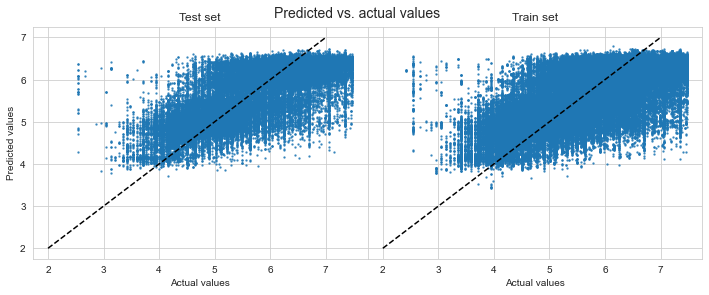

In [111]:
nn_model_evaluation(nn2)


# Model 3: four-layer neural network with L1 regularization and more epochs


In [112]:
# Building the model
nn3 = models.Sequential()
nn3.add(layers.Dense(20, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(13, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(6, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(3, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

In [113]:
# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [114]:
# Model summary
print(nn3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_8 (Dense)              (None, 13)                273       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
#model training
nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

Train on 301176 samples, validate on 33464 samples
Epoch 1/150
301176/301176 [==============================] - 2s 8us/step - loss: 18.9081 - mean_squared_error: 18.6441 - val_loss: 0.8468 - val_mean_squared_error: 0.6600
Epoch 2/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.7526 - mean_squared_error: 0.5565 - val_loss: 0.6633 - val_mean_squared_error: 0.4619
Epoch 3/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.6229 - mean_squared_error: 0.4436 - val_loss: 0.6034 - val_mean_squared_error: 0.4451
Epoch 4/150
301176/301176 [==============================] - 3s 9us/step - loss: 0.5746 - mean_squared_error: 0.4313 - val_loss: 0.5719 - val_mean_squared_error: 0.4414
Epoch 5/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.5455 - mean_squared_error: 0.4239 - val_loss: 0.5368 - val_mean_squared_error: 0.4235
Epoch 6/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.5272 - mean_squared

Epoch 49/150
301176/301176 [==============================] - 2s 8us/step - loss: 0.4483 - mean_squared_error: 0.4121 - val_loss: 0.4584 - val_mean_squared_error: 0.4221
Epoch 50/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4466 - mean_squared_error: 0.4105 - val_loss: 0.4468 - val_mean_squared_error: 0.4107
Epoch 51/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4468 - mean_squared_error: 0.4109 - val_loss: 0.4550 - val_mean_squared_error: 0.4191
Epoch 52/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.4469 - mean_squared_error: 0.4111 - val_loss: 0.4488 - val_mean_squared_error: 0.4131
Epoch 53/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4468 - mean_squared_error: 0.4111 - val_loss: 0.4491 - val_mean_squared_error: 0.4136
Epoch 54/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4460 - mean_squared_error: 0.4105 - val_loss: 0.4464 - val_mean_sq

Epoch 97/150
301176/301176 [==============================] - 2s 5us/step - loss: 0.4434 - mean_squared_error: 0.4115 - val_loss: 0.4438 - val_mean_squared_error: 0.4117
Epoch 98/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.4431 - mean_squared_error: 0.4112 - val_loss: 0.4539 - val_mean_squared_error: 0.4218
Epoch 99/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4424 - mean_squared_error: 0.4104 - val_loss: 0.4514 - val_mean_squared_error: 0.4196
Epoch 100/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4429 - mean_squared_error: 0.4110 - val_loss: 0.4567 - val_mean_squared_error: 0.4249
Epoch 101/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4429 - mean_squared_error: 0.4111 - val_loss: 0.4566 - val_mean_squared_error: 0.4248
Epoch 102/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.4428 - mean_squared_error: 0.4110 - val_loss: 0.4484 - val_mean

Epoch 145/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4408 - mean_squared_error: 0.4107 - val_loss: 0.4407 - val_mean_squared_error: 0.4107
Epoch 146/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4408 - mean_squared_error: 0.4107 - val_loss: 0.4423 - val_mean_squared_error: 0.4124
Epoch 147/150
301176/301176 [==============================] - 2s 8us/step - loss: 0.4407 - mean_squared_error: 0.4107 - val_loss: 0.4433 - val_mean_squared_error: 0.4133
Epoch 148/150
301176/301176 [==============================] - 2s 6us/step - loss: 0.4413 - mean_squared_error: 0.4114 - val_loss: 0.4414 - val_mean_squared_error: 0.4114
Epoch 149/150
301176/301176 [==============================] - 2s 7us/step - loss: 0.4403 - mean_squared_error: 0.4104 - val_loss: 0.4403 - val_mean_squared_error: 0.4105
Epoch 150/150
301176/301176 [==============================] - 2s 8us/step - loss: 0.4411 - mean_squared_error: 0.4112 - val_loss: 0.4414 - val_m

Training MSE: 0.4082
Validation MSE: 0.4097

Training r2: 0.4553
Validation r2: 0.453


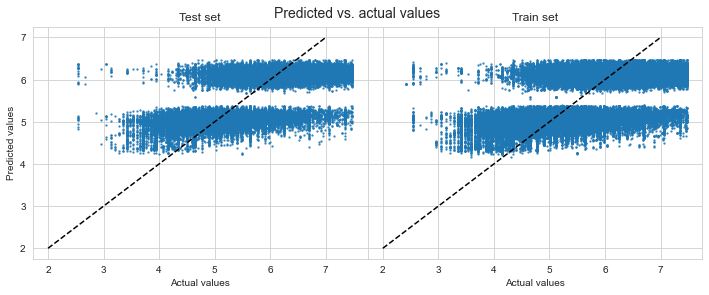

In [116]:
nn_model_evaluation(nn3)


# ANN WITH SGD Optimizer

In [117]:
# Building the model
nn4 = models.Sequential()
nn4.add(layers.Dense(13, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005),activation='relu'))
nn4.add(layers.Dense(13, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(6, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4.compile(loss='mean_squared_error',
            optimizer='SGD',
            metrics=['mean_squared_error'])

# Model summary
print(nn4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________
None


In [118]:
#model training
nn4_history = nn4.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

Train on 301176 samples, validate on 33464 samples
Epoch 1/150
301176/301176 [==============================] - 2s 6us/step - loss: 93267836526.8101 - mean_squared_error: 86917177344.0000 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 2/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 3/150
301176/301176 [==============================] - 2s 7us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 4/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 5/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epo

301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 45/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 46/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 47/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 48/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 49/150
301176/301176 [==============================] - 2s 5us/step

301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 88/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 89/150
301176/301176 [==============================] - 2s 7us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 90/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 91/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7474
Epoch 92/150
301176/301176 [==============================] - 2s 7us/step

301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 131/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7475
Epoch 132/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7474
Epoch 133/150
301176/301176 [==============================] - 2s 6us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 134/150
301176/301176 [==============================] - 2s 5us/step - loss: 6361382400.0000 - mean_squared_error: 0.7498 - val_loss: 6361382400.0000 - val_mean_squared_error: 0.7473
Epoch 135/150
301176/301176 [==============================] - 2s 6us

Training MSE: 0.7495
Validation MSE: 0.749

Training r2: -0.0
Validation r2: -0.0


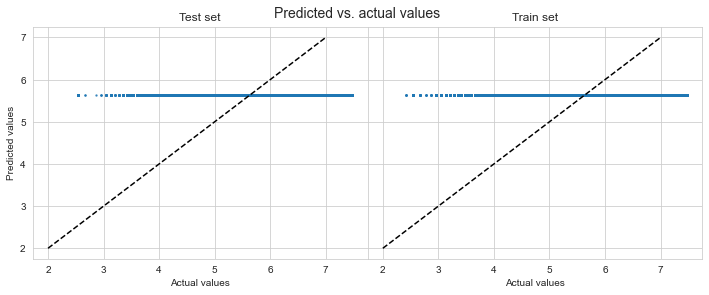

In [119]:
nn_model_evaluation(nn4)


#model performed worse here